In [10]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [11]:
plt.rcParams["figure.figsize"] = (6,6)

In [12]:
import numpy as np
import torch
from sklearn import datasets

# Simple gradients on tensors

In [4]:
a = torch.ones((3,2), requires_grad=True)                                   
b = torch.ones((3,2), requires_grad=True)
#This makes it so that Pytorch tracks whatever we do to these tensors. IF we do some sort of computation, pytorch will
#collect what happened, and gather gradients for us.

In [5]:
a

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [6]:
b

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)

In [7]:
c = (5 * a + 2 * b).sum() #calculates some scalar function (return a 0-D tensor.)

In [8]:
c #we can see here there is a grad_fn = ..., telling us that there is a funciton here allowing us to calculate the gradient

tensor(42., grad_fn=<SumBackward0>)

In [75]:
a.grad 
#When running this, nothing is returned. This is because gradients are not calculated immediately. Pytorch
#tracked everything with a and b, but until we tell it to calculate the derivatives (with the function .backward), a will
# will not have a gradient

In [76]:
b.grad


The partial derivative of c, in regards to a (and the same would apply for b):

The function would like like this, as we treat b as a constant
$$
c = \sum_{ij} 5a_{ij}
$$

Then the gradient (partial derivative) for each elent in our gradient array will be:

$$
    \frac{\partial c}{\partial a_{ij}} = \frac{\partial}{\partial a_{ij}}\sum_{km} 5a_{km} = 5 \sum_{km} \delta_{ik}\delta_{mj}  = 5
$$

In [77]:
#c = (5 * a).sum()

In [78]:
c

tensor(42., grad_fn=<SumBackward0>)

In [79]:
a.grad is None

True

In [80]:
c.backward() #We say to Pytorch "I did some operations and created a scalar function (c), with a and b, and both 
#  require gradients. Please let me see those gradients."

In [81]:
a.grad #partial derivative of C over a
#So element [0,0] is the partial derivative of C over a[0,0], [0,1] is the partial derivative of c over a[0,1], etc.

tensor([[5., 5.],
        [5., 5.],
        [5., 5.]])

In [82]:
b.grad 

tensor([[2., 2.],
        [2., 2.],
        [2., 2.]])

In [83]:
a.grad.zero_()
b.grad.zero_()

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

# Logistic regression example

In [14]:
X, y = datasets.make_blobs(1000, centers=[[-3, -3], [0, 0]], cluster_std=1.25)
## creates a number of clusters with labels assigned to them.
#Centers is the location of the centers of each cluster

We have two features here, each point on the graph is represented by three numbers: X0, X1, label 
(which is either 0 or 1). We want to "draw a line" along the middle, so that if we get new data, we know how to label it.

This line, on this graph, would theoretically be a 45 degree angle from the top left, to the bottom right.
The location of this line is determined by W and b (weight and bias) assigned. The Weight creates a diagnol vector going through the origin (Wx+B), and the decision boundry is a perpendicular line to the vector, created using the scalar product to the line. The location of the line is thedistance of b from the origin.

The goal of the logistic regression is to create a line which is optimal towards this classifier, by training the values of W and b (using a loss function)

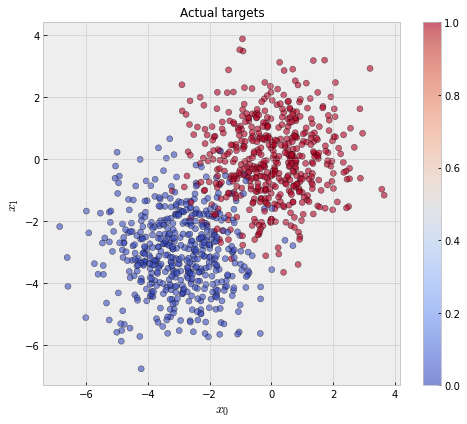

In [15]:
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()



In [16]:
Xt = torch.tensor(X, dtype=torch.float)
yt = torch.tensor(np.expand_dims(y, axis=-1), dtype=torch.float)

Sigmoid activation function is defined as:
    
$$
\sigma (x) = \frac{1}{1+e^{-x}}
$$

Text(0.5, 1.0, 'Sigmoid function')

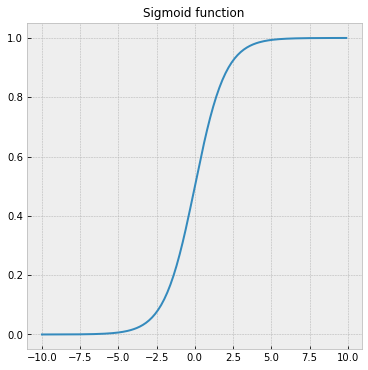

In [87]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, 1/(1+np.exp(-x)))
plt.title("Sigmoid function", fontsize=12)

This sigmoid function can be imagined as pictured along our plot above. The bottom left corner is the bottom left point of the plot, which are hte values closest to 0. The top right are the values closest to 1.
The middel diagnol is the equivelent to 0.5- we don't know how to classify it (the reality is, the probability of this happening is actually small. but its the line that tells us which values are less than or greater than 0.5)

In [17]:
def sigmoid(a):
    """Sigmoid activation function."""

    return 1/(1 + (-a).exp())

In [89]:
X

array([[-0.66250301,  0.47143293],
       [ 1.51521918, -0.22731573],
       [-3.51070134, -3.71827854],
       ...,
       [-4.37045329, -4.58475996],
       [-0.37439372, -0.16822932],
       [-3.77212164, -4.5507524 ]])

In [90]:
y

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [19]:
W = torch.randn(2, 1, requires_grad=True) #Both require gradient, because we will optimize them
b = torch.randn(1, 1, requires_grad=True)

In [20]:
W, b

(tensor([[-0.8857],
         [-0.4466]], requires_grad=True),
 tensor([[0.0282]], requires_grad=True))

## Meaning of $W$ and $b$

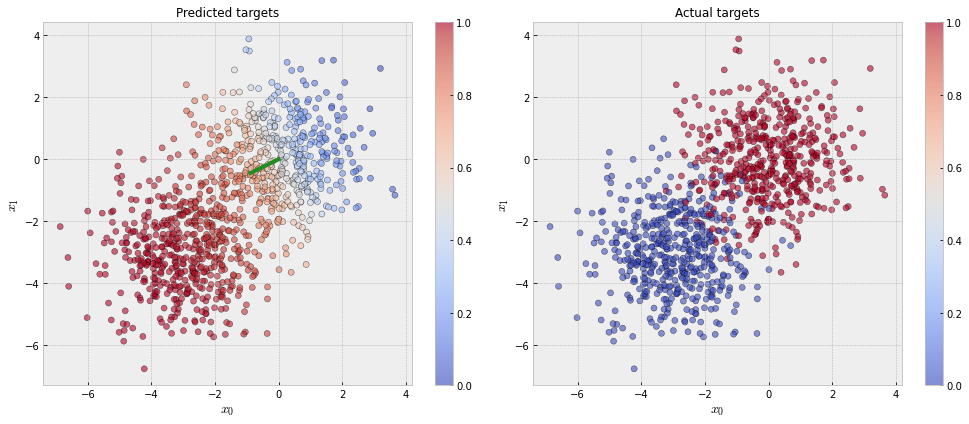

In [21]:
y_pred = sigmoid(torch.mm(Xt, W) + b) #mm is matrix multiplication

plt.figure(figsize=(14,6))
#First we plot the predictions based off our random assignments to W and b (meaning, a bad prediction)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4) #Plots our weight vector
plt.title("Predicted targets", fontsize=12)

#Then we plot our actual targets
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

The gren line is our vector Wx+b. The decision boundary created is a perpendicular line to the vector, going through the distance of b to 0 (negatively if positive, and positive if negative)

We can see how this wasn't a very good prediction. Lets try and change W to see its effect on the data.

In [22]:
W = torch.Tensor([[1], [1]]) 
#Looking at the correct graph, we see that the split is approximately at a 45 degree angle. So if we change our W's to 
# (1, 1), which is a horizontal and vertical cross, then the decision boundary should be a 45 degree angle


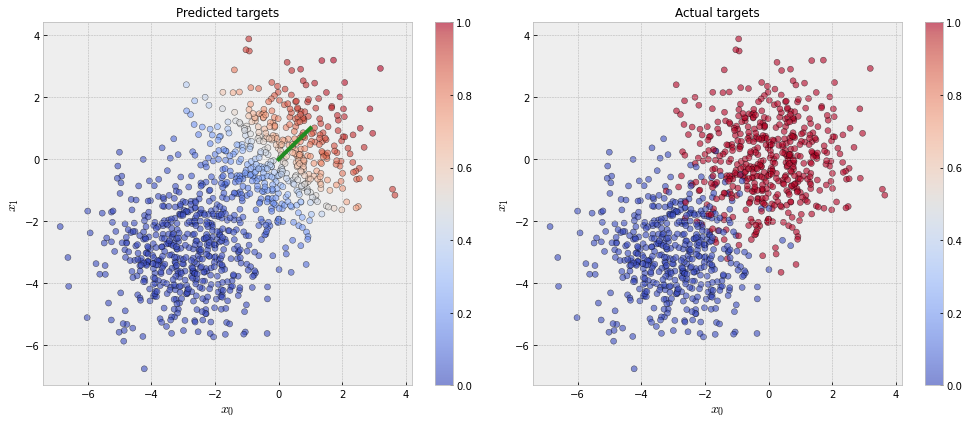

In [23]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

Much better, directionally. However, it is a little to much shifted, so lets change b

In [24]:
b = torch.Tensor([[3]])

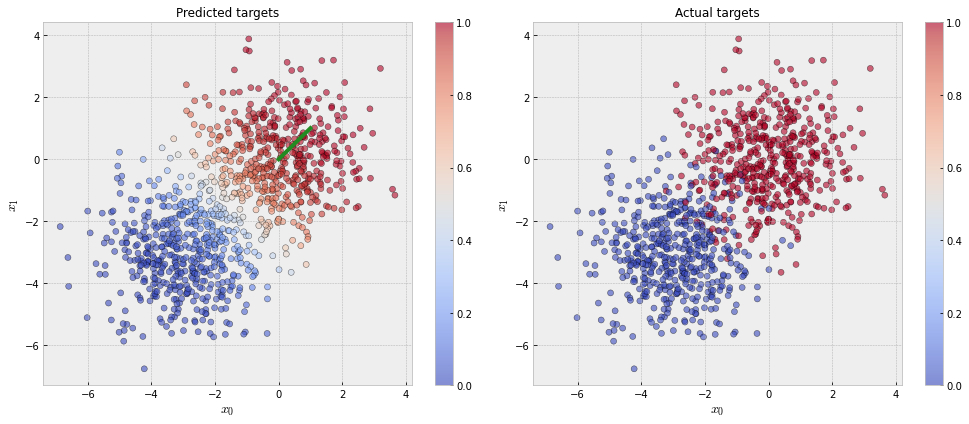

In [25]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

This is much closer to the actual targets, and know we have two nice red and blue clusters.
We have played with diretion of W and positon of B, but what about the length of W? The length of the vector determines the width of the gradient (decision boundary).

In [98]:
W = torch.Tensor([[0.5], [0.5]]) #making W shorter, to make the width of the gradient shorter
b = torch.Tensor([[1]])

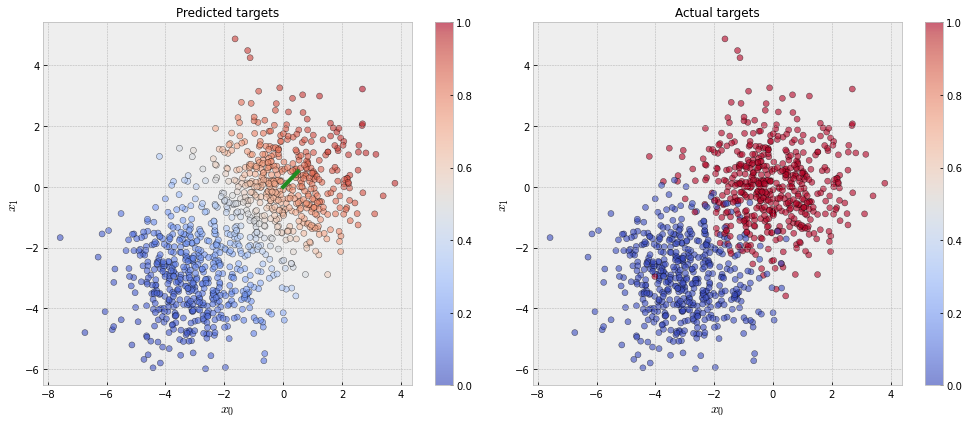

In [99]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [100]:
W = torch.Tensor([[5], [5]]) #This makes the gradient almost non existent, with the vector being long. 
#Longer the vector, sharper the transition
b = torch.Tensor([[15]])

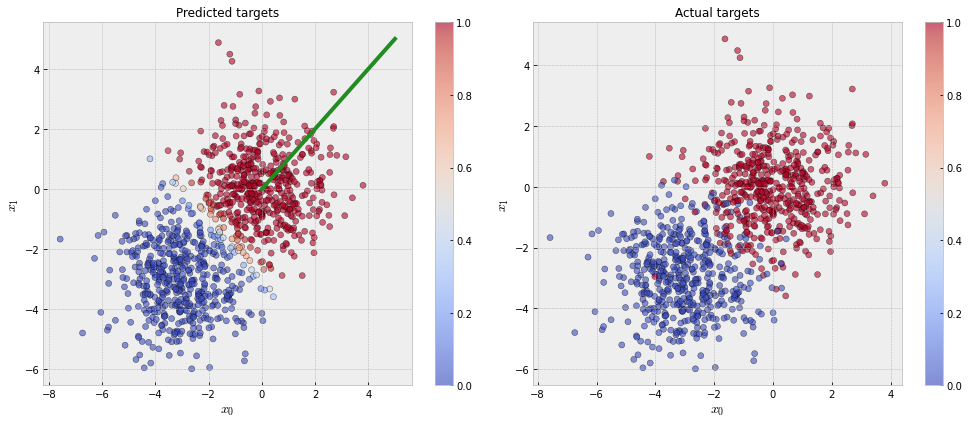

In [101]:
y_pred = sigmoid(torch.mm(Xt, W) + b)

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

## Log-loss

$$
L = - \frac{1}{N} \sum_k \left(y_k \log\left(\hat y_k\right) + \left(1 - y_k\right) \log\left(1 - \hat y_k\right)\right)
$$

$$
\hat y_i = \sigma(X_{ik}W_{k}+b)
$$

Just explaining how it works and not where it comes from:


 Yk is a real label, yHat k is a predicted probability (e.g. yk = 1, and yHat = 0.9, a high proabbility for class 1). 
case 1): y = y, yHat = 0.9. This is good, and will be mmultiplied by 1*Log0.9 + 0*Log0.1
case 2) y = 0, yHat 0.9. This is bad, therefore first will be 0*Log0.9, + Log0.1

In simple terms: THe model is small when the model is correct (0 and 0.1), and it is large when the model is wrong (0, 0.9)

yHati is then the predicted probabilty which we just constructed.

The question then is, how do we optimize this function, so that the losses are as small as possible? For this,, we need gradient descent

In [26]:
#Lets recreate our random W and b. In multidemensional cases, not so simple to just look at the graphs and guess random values.
W = torch.randn(2, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

In [27]:
def output(x, w, b):
    return sigmoid(torch.mm(x, w) + b)

def logloss(y, y_pred):
    return -(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean() #.mean takes the place of the 1/n

Estimate probability:

$$
L = - \frac{1}{N} \sum_k (y_k \log(\hat y_k) + (1 - y_k) \log(1 - \hat y_k)) = -\langle\log P\rangle \approx -\log \langle P\rangle
$$

Hence:

$$
\langle P\rangle \approx e^{-L}
$$


In [28]:
y_pred = output(Xt, W, b)
loss = logloss(yt, y_pred)
loss.item(), (-loss).exp().item() #This second valye is e^(-L), turning our L into a meaningful value of
#average probability of correct class. We want minimumally a probability of 0.9 for a good model, so we need to optimize.

(3.7313525676727295, 0.023960405960679054)

In [29]:
EPOCHS = 1000 #number of iterations
LR = 1e-1 #Learning rate. When we get our gradients, we want to move towards the optimization gradually, in small steps.
        # If we step too largely towards the minimum, we will overstep past it.
DELTA = 0.00001 #Will explain later
loss_history = [] #record loss history

for i in range(EPOCHS):
    y_pred = output(Xt, W, b)
    loss = logloss(yt, y_pred)
    loss.backward() #calculate the backward pass (gradients) for W and b
    
    loss_history.append(loss.item()) #store the values of this lost

    with torch.no_grad(): #context manager, saying to torch that this is just an update step, and we dont need to record it.
        #                  Do to not keep track of it for gradient computations.
        W.sub_(LR * W.grad) #Subtract LR*the gradient from W (if a negative number then add).
        b.sub_(LR * b.grad)
    W.grad.zero_()
    b.grad.zero_()

    if i % 20 == 0: #only print each 20th, to reduce noise of the output
        print(f"Epoch {i}: loss = {loss_history[-1]}")
    
    try: # we run try, because on the first iteration, there is no loss_history[-2] yet, so we will get an out of range error
        if loss_history[-2] - loss_history[-1] < DELTA: #If loss isnt improved anymore, then break out of the function
            break
    except:
        pass

Epoch 0: loss = 3.7313525676727295
Epoch 20: loss = 0.27510181069374084
Epoch 40: loss = 0.24760830402374268
Epoch 60: loss = 0.2316940575838089
Epoch 80: loss = 0.219209223985672
Epoch 100: loss = 0.20905107259750366
Epoch 120: loss = 0.2006218582391739
Epoch 140: loss = 0.1935158371925354
Epoch 160: loss = 0.1874447762966156
Epoch 180: loss = 0.1821981966495514
Epoch 200: loss = 0.1776191145181656
Epoch 220: loss = 0.17358799278736115
Epoch 240: loss = 0.17001229524612427
Epoch 260: loss = 0.166819229722023
Epoch 280: loss = 0.16395074129104614
Epoch 300: loss = 0.16136011481285095
Epoch 320: loss = 0.15900911390781403
Epoch 340: loss = 0.15686622262001038
Epoch 360: loss = 0.154905304312706
Epoch 380: loss = 0.15310442447662354
Epoch 400: loss = 0.15144504606723785
Epoch 420: loss = 0.14991138875484467
Epoch 440: loss = 0.14848993718624115
Epoch 460: loss = 0.1471690833568573
Epoch 480: loss = 0.1459387242794037
Epoch 500: loss = 0.14479011297225952
Epoch 520: loss = 0.1437155902385

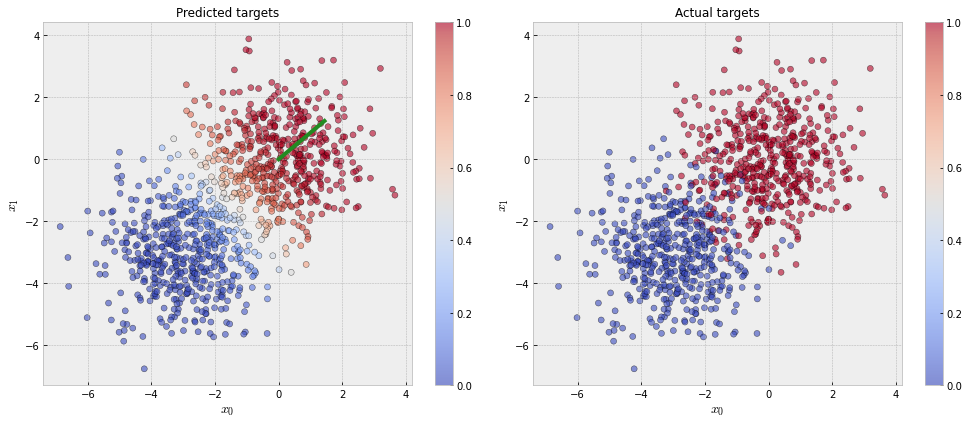

In [30]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k', #detach the gradients related to the y_pred tensor
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4)
plt.title("Predicted targets", fontsize=12)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [31]:
W, b


(tensor([[1.4405],
         [1.2317]], requires_grad=True),
 tensor([[3.9275]], requires_grad=True))

Before we guessed that out b was 3. We can see that we actually weren't that off, but it still wasn't optimal.

Right now, our plot is outputting probabilities between 1 and 0, but we need it to output classes (1 and 0).

Text(0, 0.5, 'loss')

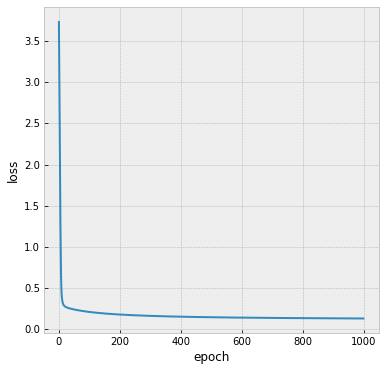

In [32]:
plt.figure(figsize=(6,6))
plt.plot(loss_history)
plt.xlabel("epoch")
plt.ylabel("loss")

In this case our loss was smooth, normally we see something much more noisy

In [33]:
y_ = y_pred.detach().numpy().flatten()

# Classification metrics

In [34]:
from sklearn.metrics import classification_report
#classification report tells us things about how good our prediction is

In [35]:
y_class = (y_ >= 0.5).astype(int)
y_class

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,

In [36]:
print(classification_report(y, y_class))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       500
           1       0.96      0.94      0.95       500

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



We see that that how our model predicts at a very high level, however it isn't perfect. We know that this was going to be the case, because there was overlap between the two clusters in our targer data, which is very difficult to predict,

### Histogram of Probabilities

(array([  0.,   9.,   6.,  10.,   5.,  11.,  16.,  20.,  52., 371.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ],
       dtype=float32),
 <BarContainer object of 10 artists>)

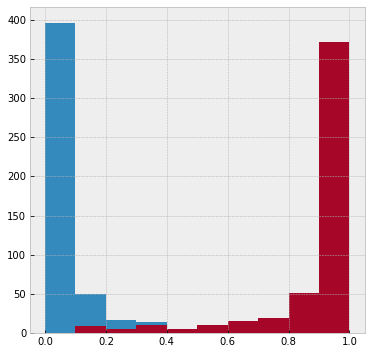

In [37]:
plt.hist(y_[y==0], range=(0,1))
plt.hist(y_[y==1], range=(0,1))

Here, we can see see for example, the reds which had a probability of less than 0.5. These were the values which were predicted incorrectly for us.

In [114]:
(y==0).mean()

0.5

Another way to print our accuracy:

In [115]:
# y_ = y_pred.detach().numpy().flatten()

np.mean((y_ >0.5).astype(int) == y)

0.953

## Implementing the Model

Lets make new data. We will also include a y label to check our accuracy again. However in the real world, we don't have a y label on our new data (because that is what our model is trying to produce.)

In [38]:
X, y = datasets.make_blobs(1000, centers = ([-3,-3], [1,1]), cluster_std = 2) #Lets change the centers to make them further, but increase std
Xt = torch.tensor(X, dtype= torch.float)
Xy = torch.tensor(y, dtype = torch.float)

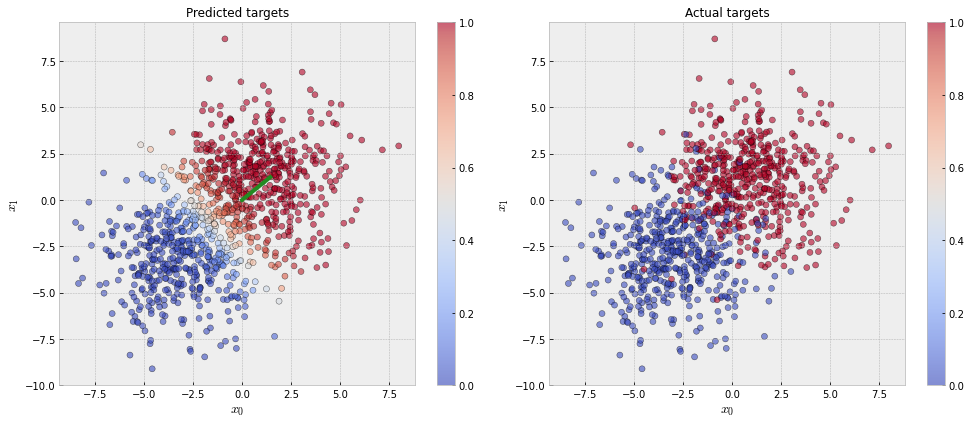

In [39]:
y_pred = sigmoid(torch.mm(Xt, W) + b) #mm is matrix multiplication

plt.figure(figsize=(14,6))
#First we plot the predictions based off our random assignments to W and b (meaning, a bad prediction)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_pred.detach().numpy().flatten(), alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.plot([0, W[0, 0].item()],[0, W[1,0].item()], "-", c="forestgreen", linewidth=4) #Plots our weight vector
plt.title("Predicted targets", fontsize=12)

#Then we plot our actual targets
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6, edgecolor='k',
            cmap=plt.cm.coolwarm, vmin=0, vmax=1)
plt.colorbar()
plt.xlabel('$x_0$', fontsize=14)
plt.ylabel('$x_1$', fontsize=14)
plt.title("Actual targets", fontsize=12)
plt.tight_layout()

In [40]:
y_ = y_pred.detach().numpy().flatten() #detach gradients
y_class = (y_ >= 0.5).astype(int) #make boolean
print(classification_report(y, y_class))


              precision    recall  f1-score   support

           0       0.97      0.86      0.91       500
           1       0.88      0.97      0.92       500

    accuracy                           0.92      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.92      0.92      0.92      1000



Even with more varied data (std = 2), our model was able to predict at a 92% accuracy rate.
We can try other values for cluster locations, and std as well:

In [142]:
X, y = datasets.make_blobs(1000, centers = ([-3,-2], [-1,0]), cluster_std = 1.5) #Lets change the centers to make them further, but increase std
Xt = torch.tensor(X, dtype= torch.float)
Xy = torch.tensor(y, dtype = torch.float)

y_pred = sigmoid(torch.mm(Xt, W) + b)

y_ = y_pred.detach().numpy().flatten() #detach gradients
y_class = (y_ >= 0.5).astype(int) #make boolean
print(classification_report(y, y_class))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       500
           1       0.85      0.82      0.83       500

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



We see here that closer clusters with higher std is not so great for our current model. Which makes sense, as the values are too sporatic, and might be too hard to predict properly.